In [152]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [153]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 17

In [154]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [155]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [156]:
len(dataset)

645

In [157]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[12 12  6  6  4  8 12  1 12  7 11  2 10 10 12  7 12  5 12  5 11  9 12  9
 12  1  1  7  2  0 12  6]


In [158]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[152. 147. 153.]
  [146. 141. 147.]
  [143. 138. 144.]
  ...
  [132. 127. 131.]
  [133. 128. 132.]
  [132. 127. 131.]]

 [[153. 148. 154.]
  [147. 142. 148.]
  [145. 140. 146.]
  ...
  [133. 128. 132.]
  [131. 126. 130.]
  [130. 125. 129.]]

 [[154. 149. 155.]
  [149. 144. 150.]
  [148. 143. 149.]
  ...
  [129. 124. 128.]
  [126. 121. 125.]
  [124. 119. 123.]]

 ...

 [[151. 146. 143.]
  [154. 149. 146.]
  [156. 151. 148.]
  ...
  [124. 116. 114.]
  [121. 113. 111.]
  [120. 112. 110.]]

 [[147. 142. 139.]
  [146. 141. 138.]
  [147. 142. 139.]
  ...
  [123. 115. 113.]
  [118. 110. 108.]
  [115. 107. 105.]]

 [[151. 146. 143.]
  [149. 144. 141.]
  [150. 145. 142.]
  ...
  [123. 115. 113.]
  [121. 113. 111.]
  [120. 112. 110.]]], shape=(256, 256, 3), dtype=float32)


In [159]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[146. 134. 138.]
  [156. 144. 148.]
  [151. 139. 143.]
  ...
  [154. 135. 137.]
  [133. 114. 116.]
  [133. 114. 116.]]

 [[143. 131. 135.]
  [155. 143. 147.]
  [155. 143. 147.]
  ...
  [158. 139. 141.]
  [143. 124. 126.]
  [154. 135. 137.]]

 [[155. 143. 147.]
  [157. 145. 149.]
  [151. 139. 143.]
  ...
  [131. 112. 114.]
  [120. 101. 103.]
  [138. 119. 121.]]

 ...

 [[146. 127. 133.]
  [146. 127. 133.]
  [147. 128. 134.]
  ...
  [155. 136. 142.]
  [154. 135. 141.]
  [153. 134. 140.]]

 [[144. 125. 131.]
  [147. 128. 134.]
  [150. 131. 137.]
  ...
  [155. 136. 142.]
  [153. 134. 140.]
  [151. 132. 138.]]

 [[141. 122. 128.]
  [145. 126. 132.]
  [150. 131. 137.]
  ...
  [158. 139. 145.]
  [156. 137. 143.]
  [153. 134. 140.]]]


In [160]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


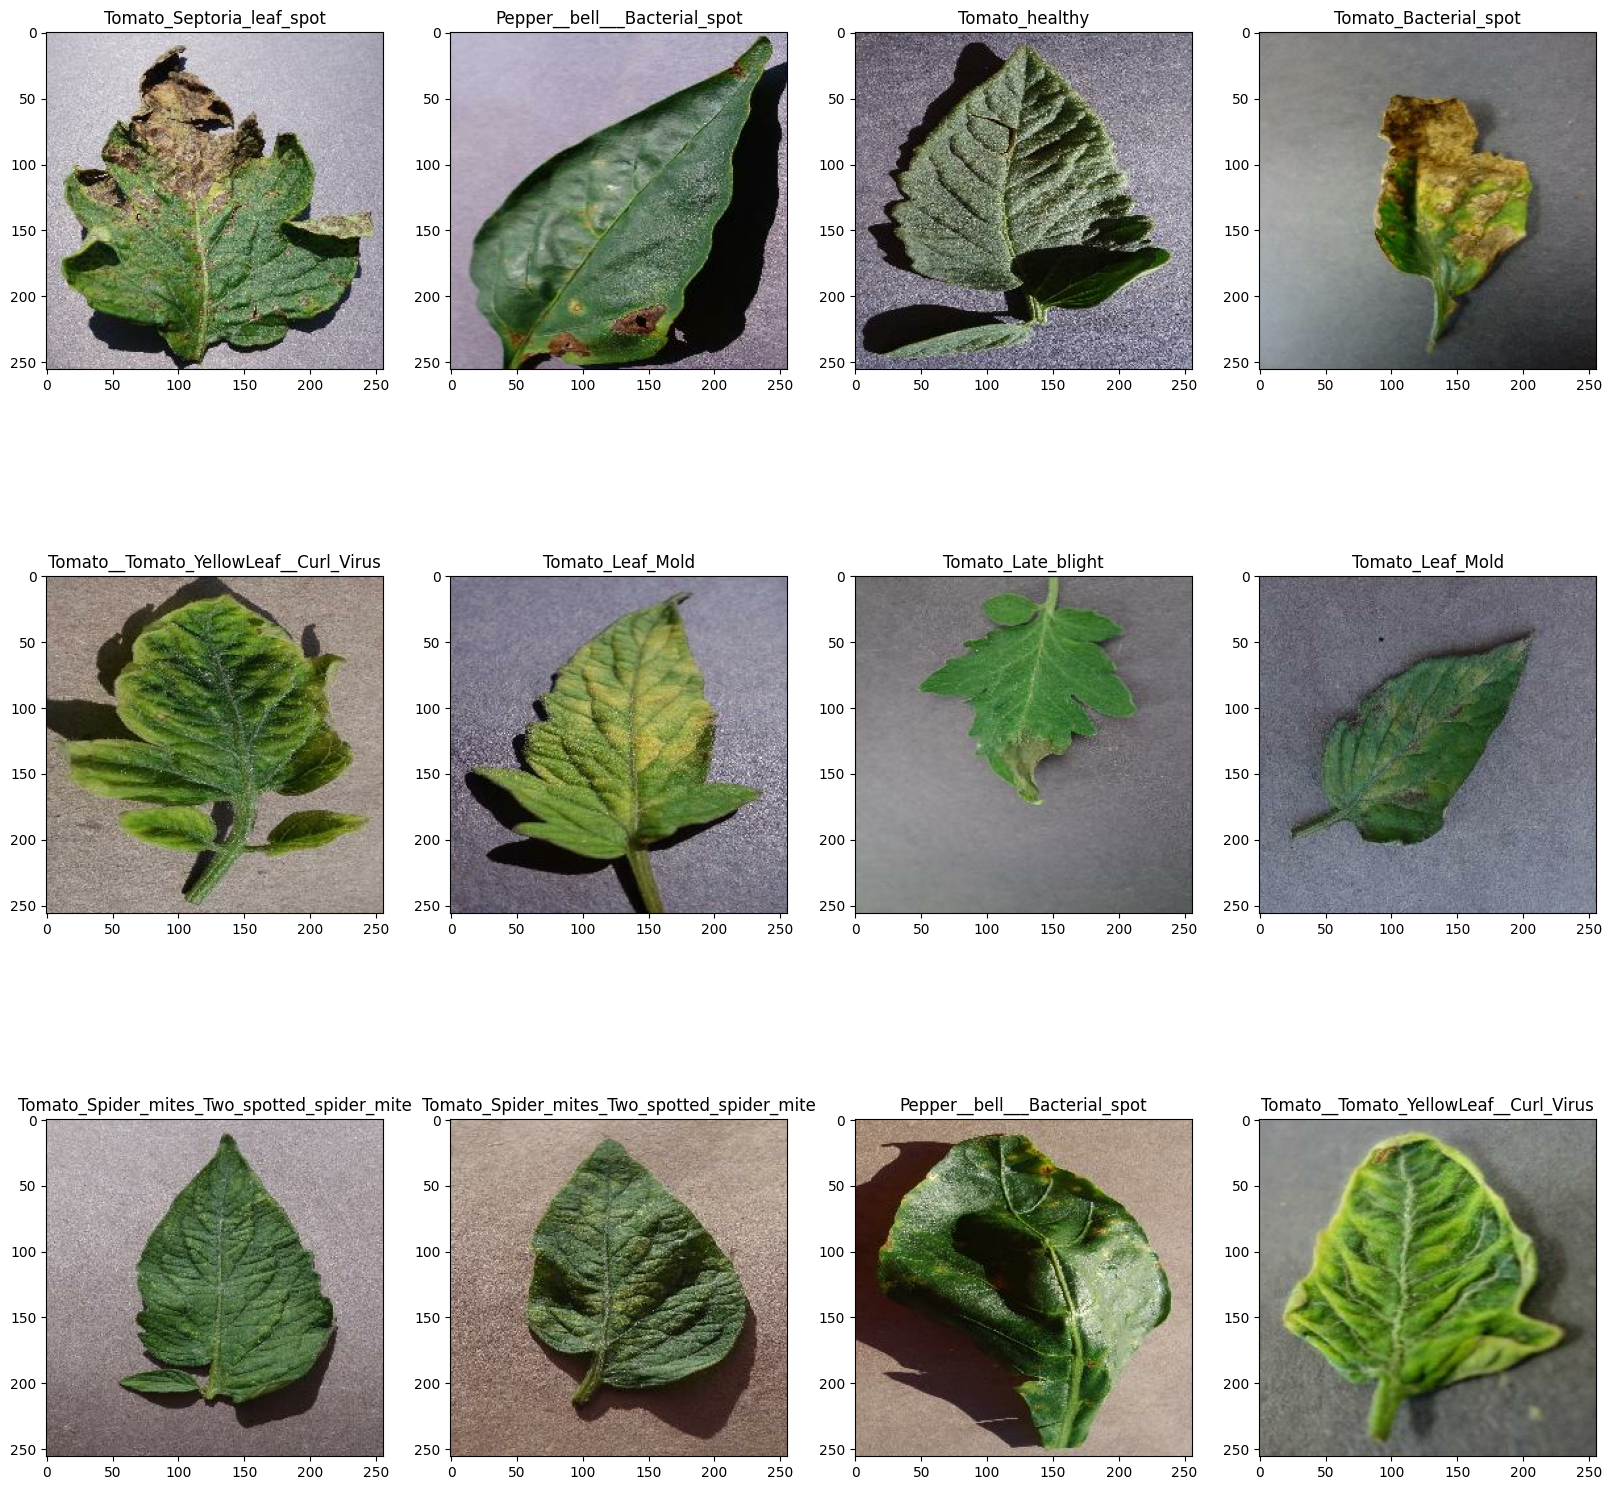

In [161]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
    

In [162]:
len(dataset)

645

In [163]:
train_size = 0.8
len(dataset)*train_size

516.0

In [164]:
train_ds = dataset.take(516)
len(train_ds)

516

In [165]:
test_ds = dataset.skip(516)
len(test_ds)

129

In [166]:
val_size = 0.1
len(dataset)*val_size

64.5

In [167]:
val_ds = test_ds.take(64)
len(val_ds)

64

In [168]:
test_ds = test_ds.skip(64)
len(test_ds)

65

In [169]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size =  int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [170]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [171]:
len(train_ds)

516

In [172]:
len(val_ds)

64

In [173]:
len(test_ds)

65

In [174]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [175]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [190]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast([0., 1.], seed=None),
    layers.experimental.preprocessing.RandomZoom( (0.2, 0.3),width_factor=None,fill_mode='reflect',interpolation='bilinear',seed=None,fill_value=0.0)
])

In [177]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [178]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [179]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [180]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/17
516/516 [==============================] - 1634s 3s/step - loss: 1.9256 - accuracy: 0.3707 - val_loss: 1.8387 - val_accuracy: 0.4756
Epoch 2/17
516/516 [==============================] - 1674s 3s/step - loss: 1.1158 - accuracy: 0.6297 - val_loss: 1.5065 - val_accuracy: 0.5610
Epoch 3/17
516/516 [==============================] - 1613s 3s/step - loss: 0.7491 - accuracy: 0.7496 - val_loss: 1.3925 - val_accuracy: 0.6113
Epoch 4/17
516/516 [==============================] - 2500s 5s/step - loss: 0.5832 - accuracy: 0.8018 - val_loss: 1.2774 - val_accuracy: 0.6313
Epoch 5/17
516/516 [==============================] - 2453s 5s/step - loss: 0.4850 - accuracy: 0.8322 - val_loss: 1.2004 - val_accuracy: 0.6436
Epoch 6/17
516/516 [==============================] - 2004s 4s/step - loss: 0.4463 - accuracy: 0.8486 - val_loss: 0.7923 - val_accuracy: 0.7388
Epoch 7/17
516/516 [==============================] - 1300s 3s/step - loss: 0.4094 - accuracy: 0.8589 - val_loss: 0.7279 - val_accuracy:

In [181]:
score = model.evaluate(test_ds)

65/65 [==============================] - 816s 564ms/step - loss: 0.8031 - accuracy: 0.7567


In [182]:
score

[0.803149402141571, 0.7567307949066162]

In [183]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

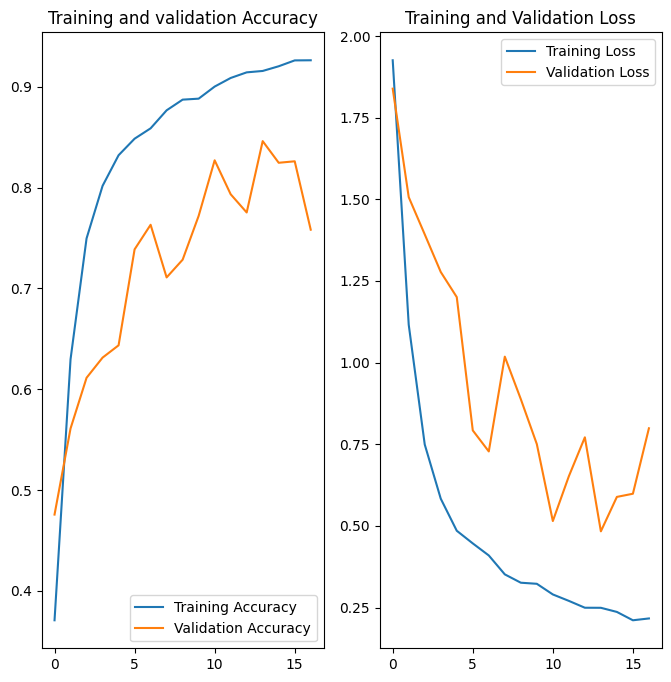

In [184]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
first image's actual label:  Tomato_Septoria_leaf_spot
1/1 [==============================] - 1s 585ms/step
predicted label: Tomato_Late_blight


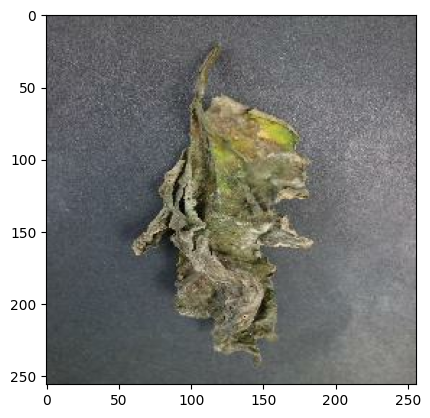

In [185]:
import numpy as np
for images_batch, labeks_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label: ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [186]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class

1/1 [==============================] - 0s 54ms/step


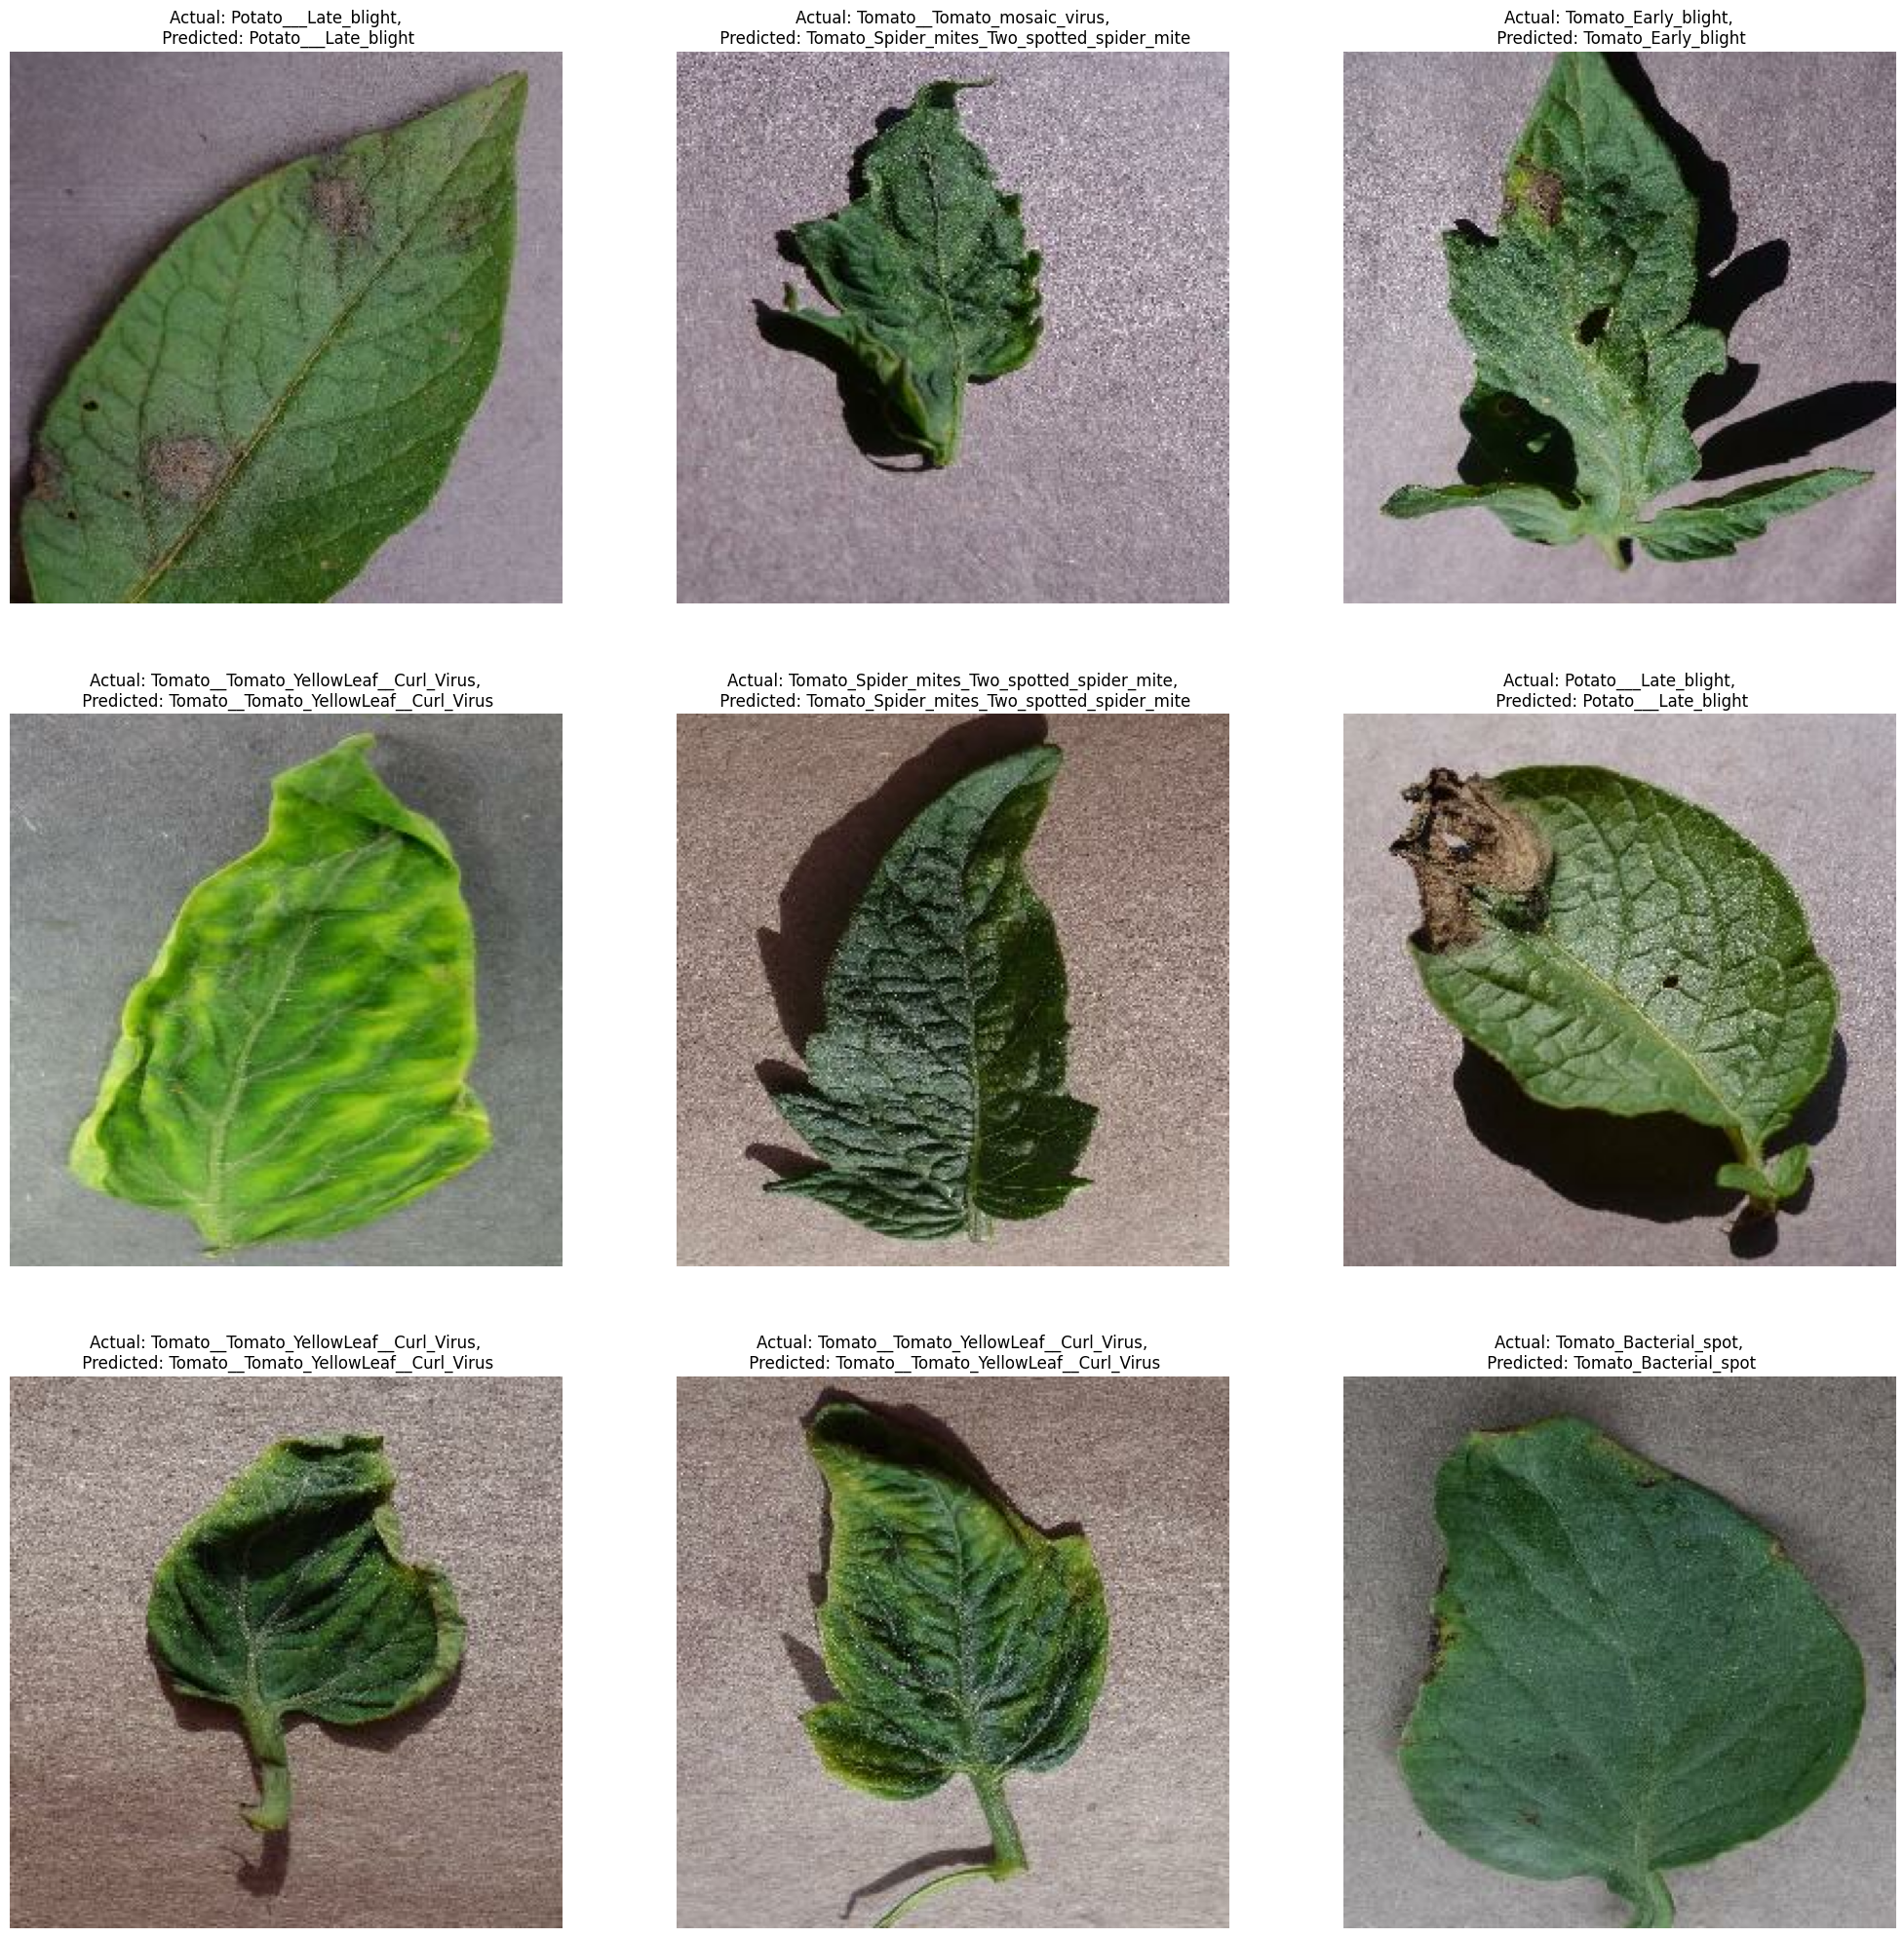

In [187]:
plt.figure(figsize=(25,25))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class = predict(model, images[i].numpy)
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")

In [189]:
model_version=4
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
